<a href="https://colab.research.google.com/github/Tamonwanjn/Project_Kpop_Idol_Instagram_Followers/blob/main/idols_Regression_on_Autopilot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODING TASK #1: IMPORT LIBRARIES AND DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# For Autogluon to work in Google Colab, you need to install ipykernel and restart the notebook
# The IPython kernel is the Python execution backend for Jupyter
!pip install -U ipykernel

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

  Using cached setuptools-69.0.2-py3-none-any.whl.metadata (6.3 kB)
Using cached setuptools-69.0.2-py3-none-any.whl (819 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 60.2.0
    Uninstalling setuptools-60.2.0:
      Successfully uninstalled setuptools-60.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
openxlab 0.0.32 requires setuptools~=60.2.0, but you have setuptools 69.0.2 which is incompatible.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 2.0.1 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 2.0.1 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 2.0.1 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.0.2
    Uninstalling setuptools-69.0.2:
      Successfully uninstalled setuptools-69.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
cvxpy 1.3.2 requires setuptools>65.5.1, but you have setuptools 60.2.0 which is incompatible.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 2.0.1 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 2.0.1 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 2.0.1 which is incompatible.


In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/DataClean"

/content/drive/MyDrive/DataClean


In [ ]:
# Read the CSV file
df = pd.read_csv("/content/drive/MyDrive/DataClean/idols_data_Clean_followersUp5000000.csv")

In [ ]:
# Check data types of each column ->.dtypes
df.dtypes

stage_name      object
group           object
ig_name         object
followers        int64
birthdate       object
debut           object
company         object
country         object
gender          object
age              int64
years_active     int64
Age entry        int64
dtype: object

 #Step2: ให้ Check missing value

In [ ]:
# Check if any missing values are present in the dataframe -> .isnull().sum()
df.isnull().sum()

stage_name      0
group           0
ig_name         0
followers       0
birthdate       0
debut           0
company         0
country         0
gender          0
age             0
years_active    0
Age entry       0
dtype: int64

**# Step3: ในกรณีที่ตัวข้อมูลเป็นกลุ่มของข้อมูล (object) ให้เปลี่ยน column นั้น ให้เป็น (category)**

In [ ]:
columns_to_drop = ['birthdate', 'debut', 'stage_name', 'ig_name', 'company']
df = df.drop(columns=columns_to_drop)

In [ ]:
df.astype({'gender': 'category','group': 'category','country': 'category'}).dtypes

group           category
followers          int64
country         category
gender          category
age                int64
years_active       int64
Age entry          int64
dtype: object

In [ ]:
ohe = pd.get_dummies(data=df, columns=['gender','group','country'])

In [ ]:
ohe

,followers,age,years_active,Age entry,gender_F,gender_M,group_(G)I-DLE,group_ASTRO,group_BLACKPINK,group_BTS,...,group_TXT,group_WINNER,country_Canada,country_China,country_Hong Kong,country_Japan,country_South Korea,country_Taiwan,country_Thailand,country_USA
0,5519743,30,13,17,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,21803656,31,11,20,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,17525604,26,9,17,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6162880,22,1,21,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,8858825,24,7,17,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,6692941,26,9,17,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
79,12132886,25,9,16,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
80,5427193,21,1,20,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
81,5838243,23,5,18,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
ohe.shape

(83, 37)

In [ ]:
ohe.columns

Index(['followers', 'age', 'years_active', 'Age entry', 'gender_F', 'gender_M',
       'group_(G)I-DLE', 'group_ASTRO', 'group_BLACKPINK', 'group_BTS',
       'group_EXO', 'group_F(X)', 'group_GIRL'S DAY', 'group_GOT7',
       'group_GUGUDAN', 'group_IVE', 'group_LE SSERAFIM', 'group_MAMAMOO',
       'group_NCT', 'group_NU'EST', 'group_RED VELVET', 'group_SEVENTEEN',
       'group_SF9', 'group_SHINEE', 'group_SUPER JUNIOR', 'group_T-ARA',
       'group_TWICE', 'group_TXT', 'group_WINNER', 'country_Canada',
       'country_China', 'country_Hong Kong', 'country_Japan',
       'country_South Korea', 'country_Taiwan', 'country_Thailand',
       'country_USA'],
      dtype='object')

**# Step5: เตรียมข้อมูลสำหรับ Training data และ Testing data**

In [ ]:
# spliting the data into test 20% and train sets 80%
#Training Data เอาไว้สร้าง Model
#Testing Data เอาไว้ทดสอบประสิทธิภาพของ Model

from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(ohe, test_size=0.2, random_state=42)

In [ ]:
# AutoGluon is modularized into sub-modules for: 1. Tabular, 2. text, 3.Images
from autogluon.tabular import TabularDataset, TabularPredictor

**# Step6: TRAIN MULTIPLE MODELS USING AUTOGLUON**

In [ ]:
# Train multiple ML regression models using AutoGluon
# You need to specify the target column, train_data, limit_time, and presets
# Note that AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column
# For regression type problems, 'label' values are generally floating point non-integers with large number of unique values

predictor = TabularPredictor(label="followers", problem_type = 'regression', eval_metric = 'r2').fit(train_data = X_train, time_limit = 200, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20231217_113251"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=6, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 200 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20231217_113251/ds_sub_fit/sub_fit_ho.
Beginning AutoGluon training ... Time limit = 50s
AutoGluon will save models to "AutogluonModels/ag-20231217_113251/ds_sub_fit/sub_fit_ho"
=================== System Info ===================
AutoGluon Version:  1.0.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         CatBoost_BAG_L1   0.864048          r2       0.036214  28.653160                0.036214          28.653160            1       True          6
1     WeightedEnsemble_L2   0.864048          r2       0.037107  29.144966                0.000893           0.491807            2       True          7
2     WeightedEnsemble_L3   0.864048          r2       0.037195  29.431077                0.000981           0.777917            3       True         10
3  RandomForestMSE_BAG_L1   0.781153          r2       0.228189   1.171759                0.228189           1.171759            1       True          5
4         LightGBM_BAG_L2   0.242809          r2       0.347343  96.355582                0.014094          21.745451            2       True          9
5       LightGBMXT_B

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.09600971950211135,
  'KNeighborsDist_BAG_L1': -0.2873741413324198,
  'LightGBMXT_BAG_L1': 0.037622420226890996,
  'LightGBM_BAG_L1': 0.0431271011175397,
  'RandomForestMSE_BAG_L1': 0.7811534380978005,
  'CatBoost_BAG_L1': 0.8640482864992719,
  'WeightedEnsemble_L2': 0.8640482864992719,
  'LightGBMXT_BAG_L2': 0.2081221549709079,
  'LightGBM_BAG_L2': 0.24280898775741244,
  'WeightedEnsemble_L3': 0.8640482864992719

**# Step7: Testing and Evaluating the Performance of Model (ทดสอบประสิทธิภาพของ Model)**

In [ ]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost_BAG_L1,0.864048,r2,0.036214,28.653160,0.036214,28.653160,1,True,6
1,WeightedEnsemble_L2,0.864048,r2,0.037107,29.144966,0.000893,0.491807,2,True,7
2,WeightedEnsemble_L3,0.864048,r2,0.037195,29.431077,0.000981,0.777917,3,True,10
3,RandomForestMSE_BAG_L1,0.781153,r2,0.228189,1.171759,0.228189,1.171759,1,True,5
4,LightGBM_BAG_L2,0.242809,r2,0.347343,96.355582,0.014094,21.745451,2,True,9
5,LightGBMXT_BAG_L2,0.208122,r2,0.348934,94.243518,0.015685,19.633387,2,True,8
6,KNeighborsUnif_BAG_L1,0.096010,r2,0.013019,0.004724,0.013019,0.004724,1,True,1
7,LightGBM_BAG_L1,0.043127,r2,0.022243,20.056782,0.022243,20.056782,1,True,4
8,LightGBMXT_BAG_L1,0.037622,r2,0.020683,24.719000,0.020683,24.719000,1,True,3
9,KNeighborsDist_BAG_L1,-0.287374,r2,0.012899,0.004706,0.012899,0.004706,1,True,2


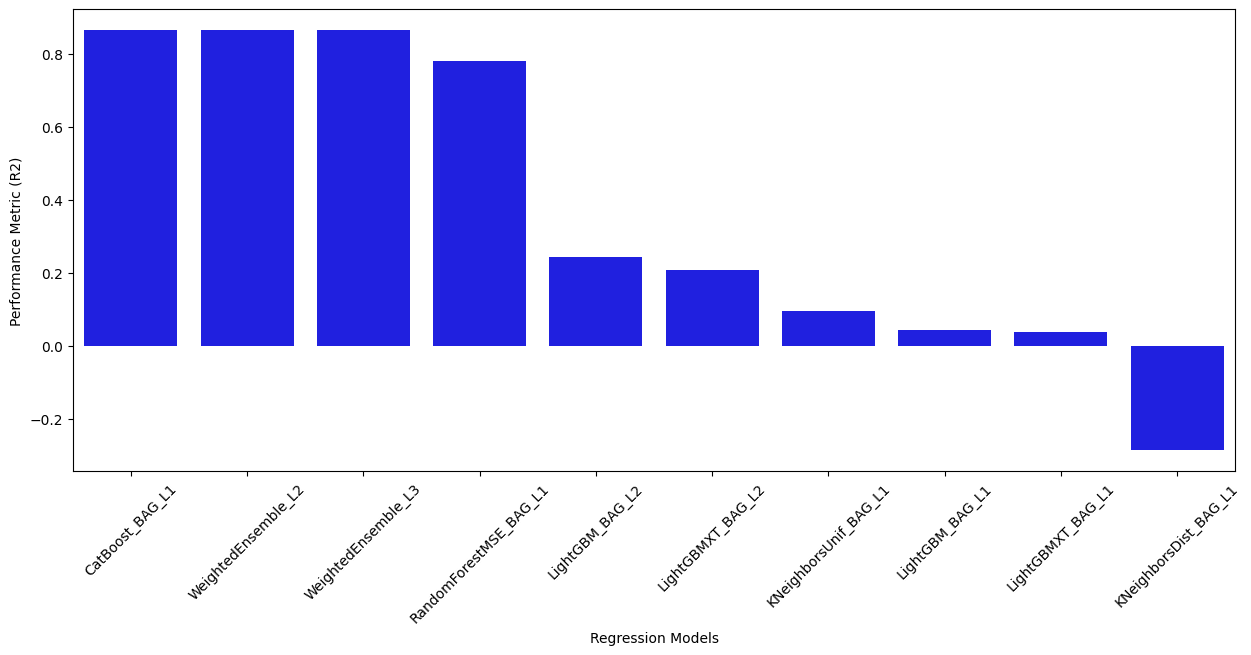

In [ ]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

In [ ]:
predictor.evaluate(X_test)

{'r2': 0.9615242219749468,
 'root_mean_squared_error': -2997447.936567802,
 'mean_squared_error': -8984694132434.574,
 'mean_absolute_error': -2485137.029411765,
 'pearsonr': 0.9826926278353019,
 'median_absolute_error': -2240214.0}

In [ ]:
# assess model performance
# Pick 5 test datasets and generate predictions
y_pred = predictor.predict(X_test)
print("Predictions:  ", list(y_pred)[:5])

Predictions:   [10226846.0, 8537323.0, 6690200.5, 7765814.5, 11217768.0]


In [ ]:
y_test = X_test['followers']
y_test #groundtruth

30     9561190
0      5519743
22     5119723
31     6463871
18    14585953
28    72397050
10     6987487
53     7661574
4      8858825
12     5471781
49     7842916
33    14619606
69     7690631
35    10563163
70     8165210
45     6264461
75    14028074
Name: followers, dtype: int64

In [ ]:
y_predict = predictor.predict(X_test)

In [ ]:
y_predict

30    10226846.0
0      8537323.0
22     6690200.5
31     7765814.5
18    11217768.0
28    69649096.0
10    10687291.0
53     7689798.0
4      9002294.0
12     6690200.5
49     9771909.0
33    21340362.0
69    11579619.0
35     7072746.0
70     9789621.0
45     8504675.0
75     9436236.0
Name: followers, dtype: float32

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 2997447.937 
MSE = 8984694132434.574 
MAE = 2485137.029411765 
R2 = 0.9615242219749468


 #Step8: Deployment โดยทำการ Save AI Model ที่ได้ เพื่อนำไปใช้ในการ deployement กับข้อมูลชุดใหม่ ที่ไม่ทราบค่า Output (ให้ Model Predict output)

In [ ]:
# loading library
import pickle

In [ ]:
# create an iterator object with write permission - model.pickle and save model
with open('idols_autopilot', 'wb') as files:
    pickle.dump(predictor, files)

In [ ]:
# load saved model
with open('idols_autopilot' , 'rb') as f:
    lr = pickle.load(f)

In [ ]:
# นำข้อมูลชุดใหม่มาทำการ prediction
#จากตัวอย่างเลือกเอาข้อมูล 5 แถวแรกจากตัวแปร X มาใช้ในการ deployment
X = ohe.drop(columns = ['followers'])
deploy_df=X.head(6)

In [ ]:
#ใช้ model ที่ load มาทำการ predict ข้อมูลชุดใหม่
deploy_Y = lr.predict(deploy_df)
deploy_Y

0     8537323.0
1    18826922.0
2    15133048.0
3     6313824.0
4     9002294.0
5    21114402.0
Name: followers, dtype: float32

In [ ]:
pd.concat([deploy_Y, deploy_df], axis=1)

,followers,age,years_active,Age entry,gender_F,gender_M,group_(G)I-DLE,group_ASTRO,group_BLACKPINK,group_BTS,...,group_TXT,group_WINNER,country_Canada,country_China,country_Hong Kong,country_Japan,country_South Korea,country_Taiwan,country_Thailand,country_USA
0,8537323.0,30,13,17,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,18826922.0,31,11,20,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,15133048.0,26,9,17,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6313824.0,22,1,21,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,9002294.0,24,7,17,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,21114402.0,30,11,19,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
